In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


2022-10-27 11:29:37.307148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define directory path for files to keep from retyping every time
#file_dir = 'C://Users/kathy/Documents/Data_Analytics/Tennis_Analysis/'

In [5]:
# Read in data file containing match data for specified year
tennis_stats_98_df = pd.read_csv("Resources/atp_matches_1998.csv")
tennis_stats_99_df = pd.read_csv("Resources/atp_matches_1999.csv")
tennis_stats_00_df = pd.read_csv("Resources/atp_matches_2000.csv")

In [6]:
# Concatenate 98, 99, and 00 files into one dataframe
tennis_stats_df = pd.concat([tennis_stats_98_df, tennis_stats_99_df, tennis_stats_00_df])

In [7]:
# Display list of column names sorted
sorted(tennis_stats_df.columns.tolist())

['best_of',
 'draw_size',
 'l_1stIn',
 'l_1stWon',
 'l_2ndWon',
 'l_SvGms',
 'l_ace',
 'l_bpFaced',
 'l_bpSaved',
 'l_df',
 'l_svpt',
 'loser_age',
 'loser_entry',
 'loser_hand',
 'loser_ht',
 'loser_id',
 'loser_ioc',
 'loser_name',
 'loser_rank',
 'loser_rank_points',
 'loser_seed',
 'match_num',
 'minutes',
 'round',
 'score',
 'surface',
 'tourney_date',
 'tourney_id',
 'tourney_level',
 'tourney_name',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_ace',
 'w_bpFaced',
 'w_bpSaved',
 'w_df',
 'w_svpt',
 'winner_age',
 'winner_entry',
 'winner_hand',
 'winner_ht',
 'winner_id',
 'winner_ioc',
 'winner_name',
 'winner_rank',
 'winner_rank_points',
 'winner_seed']

In [8]:
# Remove unnecessary columns
tennis_stats_df.drop(columns=['best_of',
                             'draw_size',
                             'loser_entry',
                             'loser_hand',
                             'loser_ht',
                             'loser_id',
                             'loser_ioc',
                             'loser_name',
                             'loser_rank',
                             'loser_rank_points',
                             'loser_seed',
                             'match_num',
                             'minutes',
                             'round',
                             'score',
                             'surface',
                             'tourney_date',
                             'tourney_id',
                             'tourney_level',
                             'tourney_name',
                             'winner_entry',
                              'winner_hand',
                              'winner_ht',
                              'winner_id',
                              'winner_ioc',
                              'winner_name',
                              'winner_rank',
                              'winner_rank_points',
                              'winner_seed'
], inplace=True)
tennis_stats_df.head()

,winner_age,loser_age,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,25.7,26.6,7.0,1.0,56.0,29.0,22.0,17.0,9.0,1.0,1.0,2.0,4.0,54.0,29.0,18.0,11.0,9.0,2.0,5.0
1,27.7,22.8,6.0,0.0,56.0,30.0,23.0,15.0,9.0,1.0,2.0,1.0,7.0,64.0,32.0,19.0,11.0,8.0,9.0,13.0
2,21.7,23.0,12.0,0.0,51.0,28.0,22.0,9.0,9.0,4.0,7.0,3.0,2.0,60.0,38.0,18.0,7.0,9.0,5.0,12.0
3,22.7,28.2,6.0,1.0,63.0,30.0,20.0,19.0,10.0,3.0,5.0,3.0,2.0,56.0,37.0,21.0,10.0,11.0,1.0,6.0
4,21.6,25.3,9.0,6.0,80.0,27.0,22.0,23.0,13.0,3.0,8.0,5.0,5.0,99.0,57.0,33.0,20.0,13.0,12.0,17.0


In [9]:
# Make a dopy of the tennis_stats dataframe
winners_df = tennis_stats_df.copy()

In [10]:
# Create winners dataframe 
winners_df.drop(columns=['loser_age',
                         'l_1stIn',
                         'l_1stWon', 
                         'l_2ndWon',
                         'l_SvGms',
                         'l_ace',
                         'l_bpFaced',
                         'l_bpSaved',
                         'l_df',
                         'l_svpt'], inplace=True)
winners_df.head()

,winner_age,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced
0,25.7,7.0,1.0,56.0,29.0,22.0,17.0,9.0,1.0,1.0
1,27.7,6.0,0.0,56.0,30.0,23.0,15.0,9.0,1.0,2.0
2,21.7,12.0,0.0,51.0,28.0,22.0,9.0,9.0,4.0,7.0
3,22.7,6.0,1.0,63.0,30.0,20.0,19.0,10.0,3.0,5.0
4,21.6,9.0,6.0,80.0,27.0,22.0,23.0,13.0,3.0,8.0


In [11]:
# Add winner column to winners_df with a value of 1
winners_df['winner'] = 1
winners_df.head()

,winner_age,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,winner
0,25.7,7.0,1.0,56.0,29.0,22.0,17.0,9.0,1.0,1.0,1
1,27.7,6.0,0.0,56.0,30.0,23.0,15.0,9.0,1.0,2.0,1
2,21.7,12.0,0.0,51.0,28.0,22.0,9.0,9.0,4.0,7.0,1
3,22.7,6.0,1.0,63.0,30.0,20.0,19.0,10.0,3.0,5.0,1
4,21.6,9.0,6.0,80.0,27.0,22.0,23.0,13.0,3.0,8.0,1


In [12]:
# Rename columns in winners_df
winners_df.rename(columns={"winner_age":"age",
                           "w_ace":"ace",
                           "w_df":"df",
                           "w_svpt":"svpt",
                           "w_1stIn":"1stIn",
                           "w_1stWon":"1stWon",
                           "w_2ndWon":"2ndWon",
                           "w_SvGms":"svGms",
                           "w_bpFaced":"bpFaced",
                           "w_bpSaved":"bpSaved"}, inplace=True)
winners_df.head()

,age,ace,df,svpt,1stIn,1stWon,2ndWon,svGms,bpSaved,bpFaced,winner
0,25.7,7.0,1.0,56.0,29.0,22.0,17.0,9.0,1.0,1.0,1
1,27.7,6.0,0.0,56.0,30.0,23.0,15.0,9.0,1.0,2.0,1
2,21.7,12.0,0.0,51.0,28.0,22.0,9.0,9.0,4.0,7.0,1
3,22.7,6.0,1.0,63.0,30.0,20.0,19.0,10.0,3.0,5.0,1
4,21.6,9.0,6.0,80.0,27.0,22.0,23.0,13.0,3.0,8.0,1


In [13]:
# Make a dopy of the tennis_stats dataframe
losers_df = tennis_stats_df.copy()

In [14]:
# Create losers dataframe
losers_df.drop(columns=['winner_age',
                         'w_1stIn',
                         'w_1stWon', 
                         'w_2ndWon',
                         'w_SvGms',
                         'w_ace',
                         'w_bpFaced',
                         'w_bpSaved',
                         'w_df',
                         'w_svpt'], inplace=True)
losers_df.head()

,loser_age,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,26.6,2.0,4.0,54.0,29.0,18.0,11.0,9.0,2.0,5.0
1,22.8,1.0,7.0,64.0,32.0,19.0,11.0,8.0,9.0,13.0
2,23.0,3.0,2.0,60.0,38.0,18.0,7.0,9.0,5.0,12.0
3,28.2,3.0,2.0,56.0,37.0,21.0,10.0,11.0,1.0,6.0
4,25.3,5.0,5.0,99.0,57.0,33.0,20.0,13.0,12.0,17.0


In [15]:
# Add loser column to winners_df with a value of 0
losers_df['winner'] = 0
losers_df.head()

,loser_age,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner
0,26.6,2.0,4.0,54.0,29.0,18.0,11.0,9.0,2.0,5.0,0
1,22.8,1.0,7.0,64.0,32.0,19.0,11.0,8.0,9.0,13.0,0
2,23.0,3.0,2.0,60.0,38.0,18.0,7.0,9.0,5.0,12.0,0
3,28.2,3.0,2.0,56.0,37.0,21.0,10.0,11.0,1.0,6.0,0
4,25.3,5.0,5.0,99.0,57.0,33.0,20.0,13.0,12.0,17.0,0


In [16]:
# Rename columns in losers_df
losers_df.rename(columns={"loser_age":"age",
                           "l_ace":"ace",
                           "l_df":"df",
                           "l_svpt":"svpt",
                           "l_1stIn":"1stIn",
                           "l_1stWon":"1stWon",
                           "l_2ndWon":"2ndWon",
                           "l_SvGms":"svGms",
                           "l_bpFaced":"bpFaced",
                           "l_bpSaved":"bpSaved"}, inplace=True)
losers_df.head()

,age,ace,df,svpt,1stIn,1stWon,2ndWon,svGms,bpSaved,bpFaced,winner
0,26.6,2.0,4.0,54.0,29.0,18.0,11.0,9.0,2.0,5.0,0
1,22.8,1.0,7.0,64.0,32.0,19.0,11.0,8.0,9.0,13.0,0
2,23.0,3.0,2.0,60.0,38.0,18.0,7.0,9.0,5.0,12.0,0
3,28.2,3.0,2.0,56.0,37.0,21.0,10.0,11.0,1.0,6.0,0
4,25.3,5.0,5.0,99.0,57.0,33.0,20.0,13.0,12.0,17.0,0


In [17]:
# Concatenate two (winners and losers) dataframes together
match_stats_df = pd.concat([winners_df, losers_df])
match_stats_df.head()

,age,ace,df,svpt,1stIn,1stWon,2ndWon,svGms,bpSaved,bpFaced,winner
0,25.7,7.0,1.0,56.0,29.0,22.0,17.0,9.0,1.0,1.0,1
1,27.7,6.0,0.0,56.0,30.0,23.0,15.0,9.0,1.0,2.0,1
2,21.7,12.0,0.0,51.0,28.0,22.0,9.0,9.0,4.0,7.0,1
3,22.7,6.0,1.0,63.0,30.0,20.0,19.0,10.0,3.0,5.0,1
4,21.6,9.0,6.0,80.0,27.0,22.0,23.0,13.0,3.0,8.0,1


In [18]:
len(match_stats_df)

20606

In [20]:
# Determine the number of unique values in each column.
match_stats_df.nunique()

age        216
ace         42
df          23
svpt       225
1stIn      146
1stWon     116
2ndWon      58
svGms       34
bpSaved     25
bpFaced     34
winner       2
dtype: int64

In [35]:
# Look at  winner value counts for binning
winner_counts = match_stats_df['winner'].value_counts()
winner_counts

1    10303
0    10303
Name: winner, dtype: int64

In [36]:
# Look at  ace value counts for binning
ace_counts = match_stats_df['ace'].value_counts()
ace_counts

Other    2463
3.0      2168
2.0      2098
4.0      1904
1.0      1902
5.0      1640
6.0      1336
7.0      1194
0.0      1186
8.0       972
9.0       732
10.0      625
Name: ace, dtype: int64

<AxesSubplot:ylabel='Density'>

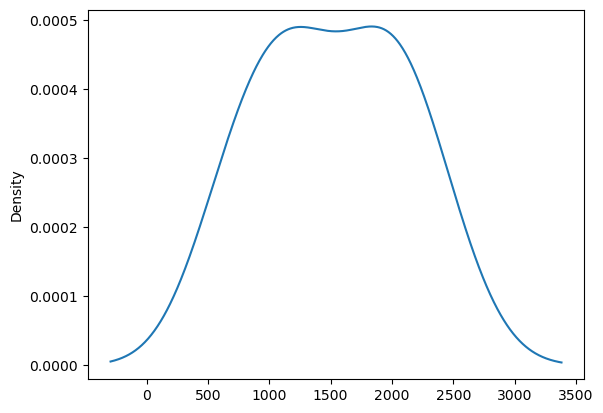

In [39]:
# Visualize the value counts of winner
ace_counts.plot.density()

In [40]:
# Determine which values to replace if counts are less than ...?
replace_winner = list(winner_counts[winner_counts < 500].index)

# Replace in dataframe
for app in replace_winner:
    match_stats_df.winner = match_stats_df.winner.replace(app,"Other")
    
# Check to make sure binning was successful
match_stats_df.winner.value_counts()

1    10303
0    10303
Name: winner, dtype: int64

In [41]:
# Look at CLASSIFICATION value counts for binning
ace_value_counts = match_stats_df['ace'].value_counts()
ace_value_counts

Other    2463
3.0      2168
2.0      2098
4.0      1904
1.0      1902
5.0      1640
6.0      1336
7.0      1194
0.0      1186
8.0       972
9.0       732
10.0      625
Name: ace, dtype: int64

<AxesSubplot:ylabel='Density'>

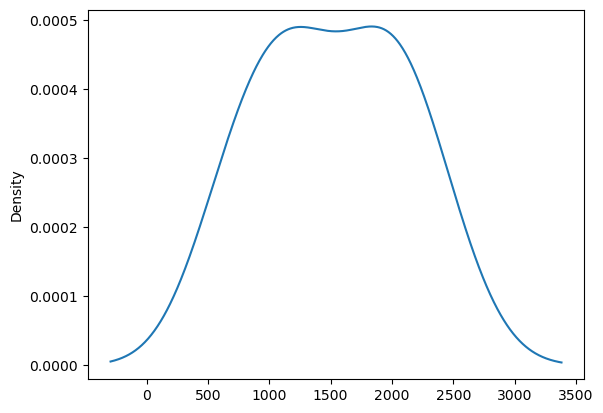

In [42]:
ace_value_counts.plot.density()

In [43]:
# Determine which values to replace if counts are less than ..?
replace_ace = list(ace_value_counts[ace_value_counts < 500].index)

# Replace in dataframe
for cls in replace_ace:
    match_stats_df.ace = match_stats_df.ace.replace(cls,"Other")
    
# Check to make sure binning was successful
match_stats_df.ace.value_counts()

Other    2463
3.0      2168
2.0      2098
4.0      1904
1.0      1902
5.0      1640
6.0      1336
7.0      1194
0.0      1186
8.0       972
9.0       732
10.0      625
Name: ace, dtype: int64

In [44]:
# Generate our categorical variable lists
match_stats_cat = match_stats_df.dtypes[match_stats_df.dtypes == "object"].index.tolist()
match_stats_cat

['ace']

In [45]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(match_stats_df[match_stats_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(match_stats_cat)
encode_df.head()

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [46]:
# Merge one-hot encoded features and drop the originals
match_stats_df = match_stats_df.merge(encode_df, left_index=True,right_index=True)
match_stats_df = match_stats_df.drop(columns = application_cat)
match_stats_df.head()

NameError: name 'encode_df' is not defined

In [47]:
# Split our preprocessed data into our features and target arrays
y = application_df['1stWon'].values
X = application_df.drop(['1stWon'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

NameError: name 'application_df' is not defined

In [48]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [49]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

NameError: name 'X_train' is not defined

In [50]:
# Compile the model
#  YOUR CODE GOES HERE
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

NameError: name 'nn' is not defined

In [51]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=30)

NameError: name 'nn' is not defined

In [52]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

NameError: name 'nn' is not defined

In [54]:
# Export the model to HDF5 file
nn.save("Bouncing Yellow Neurons.h5")

NameError: name 'nn' is not defined